Once we have data in the format set-up by the new `heron.data` interface we'll want to use it to construct models.

In [1]:
from heron.data import DataWrapper

In [2]:
data = DataWrapper("test_file_2.h5")

We can access the training data through the `get_training_data` interface on the datawrapper object.

In [3]:
x, y = data.get_training_data(label="IMR training simple", polarisation=b"+")

In [4]:
from heron.models.torchbased import HeronCUDA, train

In [5]:
import numpy as np

In [6]:
model = HeronCUDA(datafile="test_file_2.h5", datalabel="IMR training", device="cuda")

In [7]:
model.eval()

In [8]:
import matplotlib.pyplot as plt

In [9]:
import gpytorch

In [10]:
with gpytorch.settings.max_cg_iterations(1500):
    train(model, iterations=10)

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

/home/daniel/repositories/heron/environment/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:234: UserWarning: An output with one or more elements was resized since it had shape [11], which does not match the required output shape [1, 11].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.sum(mul_storage, -2, keepdim=True, out=alpha)


Dim: 0: 2.510
Dim: 1: 5.725


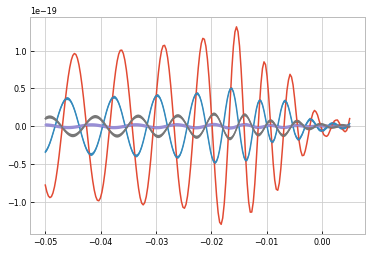

In [25]:
#with gpytorch.settings.max_cg_iterations(500):
preds = model.mean(times=np.linspace(-.05, 0.005, 200), p={"mass ratio":1.0})
plt.plot(preds[1].times, preds[1].data)
plt.fill_between(preds[1].times, preds[1].data+np.sqrt(preds[1].variance), preds[1].data-np.sqrt(preds[1].variance))
preds = model.mean(times=np.linspace(-.05, 0.005, 200), p={"mass ratio":0.7})
plt.plot(preds[1].times, preds[1].data)
plt.fill_between(preds[1].times, preds[1].data+np.sqrt(preds[1].variance), preds[1].data-np.sqrt(preds[1].variance))
preds = model.mean(times=np.linspace(-.05, 0.005, 200), p={"mass ratio":0.5})
plt.plot(preds[1].times, preds[1].data)
plt.fill_between(preds[1].times, preds[1].data+np.sqrt(preds[1].variance), preds[1].data-np.sqrt(preds[1].variance))
preds = model.mean(times=np.linspace(-.05, 0.005, 200), p={"mass ratio":0.3})
plt.plot(preds[1].times, preds[1].data)
plt.fill_between(preds[1].times, preds[1].data+np.sqrt(preds[1].variance), preds[1].data-np.sqrt(preds[1].variance))

In [13]:
model.distribution(times=np.linspace(-.05, 0.005, 200), p={"mass ratio":0.7})

/home/daniel/repositories/heron/environment/lib/python3.9/site-packages/torch/distributions/distribution.py:161: UserWarning: sample_n will be deprecated. Use .sample((n,)) instead
  warnings.warn('sample_n will be deprecated. Use .sample((n,)) instead', UserWarning)


[[<elk.waveform.Timeseries at 0x7f341766f6a0>,

In [ ]:
for kernel in model.model_plus.covar_module.base_kernel.kernels:
    print(f"Dim: {kernel.active_dims}: {kernel.lengthscale.item():.3f}")